<a href="https://colab.research.google.com/github/MSaintjohn/Python-201/blob/main/201_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/trendct/datasets/master/0415-ct-professors/ct-professor-salaries.csv')

Which Community College has the highest average salary?

In [3]:
df

,College,Average All Pay,Average Professor,Associate Professor,Assistant Professor,Lecturer,City
0,Albertus Magnus College,68409,79533.0,67059.0,55809.0,NaN,New Haven
1,Asnuntuck Community College,62190,80280.0,57159.0,48546.0,45315.0,Enfield
2,Capital Community College,63225,76905.0,60282.0,52884.0,48195.0,Hartford
3,Central Connecticut State University,76617,89910.0,72387.0,58544.0,52344.0,New Britain
4,Connecticut College,86166,111186.0,81639.0,69048.0,63000.0,New London
5,Eastern Connecticut State University,72819,86139.0,69408.0,56151.0,48357.0,Willimantic
6,Fairfield University,91926,117171.0,87516.0,74133.0,75015.0,Fairfield
7,Gateway Community College,69966,80478.0,61794.0,52767.0,52884.0,New Haven
8,Hartford Seminary,54387,62613.0,60264.0,47322.0,30987.0,Hartford
9,Holy Apostles College & Sem,29331,32139.0,38691.0,40095.0,10647.0,Cromwell


In [4]:
df.columns

Index(['College', 'Average All Pay', 'Average Professor',
       'Associate Professor', 'Assistant Professor', 'Lecturer', 'City'],
      dtype='object')

Organizing and renaming columns for clarity

In [5]:
df= df.reindex(columns=['College', 'City', 'Average All Pay', 'Average Professor', 'Associate Professor', 'Assistant Professor', 'Lecturer'])

In [6]:
df= df.rename(columns={'Average All Pay' : 'Average Pay'})

In [7]:
df.head()

,College,City,Average Pay,Average Professor,Associate Professor,Assistant Professor,Lecturer
0,Albertus Magnus College,New Haven,68409,79533.0,67059.0,55809.0,NaN
1,Asnuntuck Community College,Enfield,62190,80280.0,57159.0,48546.0,45315.0
2,Capital Community College,Hartford,63225,76905.0,60282.0,52884.0,48195.0
3,Central Connecticut State University,New Britain,76617,89910.0,72387.0,58544.0,52344.0
4,Connecticut College,New London,86166,111186.0,81639.0,69048.0,63000.0


Filter columns containg to show only community colleges

In [8]:
df1 = df[df['College'].str.contains('Community College')]

In [9]:
df1

,College,City,Average Pay,Average Professor,Associate Professor,Assistant Professor,Lecturer
1,Asnuntuck Community College,Enfield,62190,80280.0,57159.0,48546.0,45315.0
2,Capital Community College,Hartford,63225,76905.0,60282.0,52884.0,48195.0
7,Gateway Community College,New Haven,69966,80478.0,61794.0,52767.0,52884.0
10,Housatonic Community College,Bridgeport,55485,75825.0,52884.0,46818.0,26892.0
13,Manchester Community College,Manchester,67077,78345.0,57897.0,50751.0,44955.0
14,Middlesex Community College,Middletown,65889,76995.0,58788.0,50913.0,44226.0
16,Naugatuck Valley Community College,Waterbury,72864,84456.0,67599.0,58977.0,50355.0
17,Northwestern Connecticut Community College,Winsted,63468,77499.0,65205.0,52389.0,44226.0
18,Norwalk Community College,Norwalk,66393,73368.0,60903.0,50121.0,44955.0
20,Quinebaug Valley Community College,Danielson,60741,76167.0,44928.0,56574.0,50760.0


In [10]:
df1.groupby(['College'])['Average Pay'].sum()

College
Asnuntuck Community College                   62190
Capital Community College                     63225
Gateway Community College                     69966
Housatonic Community College                  55485
Manchester Community College                  67077
Middlesex Community College                   65889
Naugatuck Valley Community College            72864
Northwestern Connecticut Community College    63468
Norwalk Community College                     66393
Quinebaug Valley Community College            60741
Three Rivers Community College                62460
Tunxis Community College                      67311
Name: Average Pay, dtype: int64

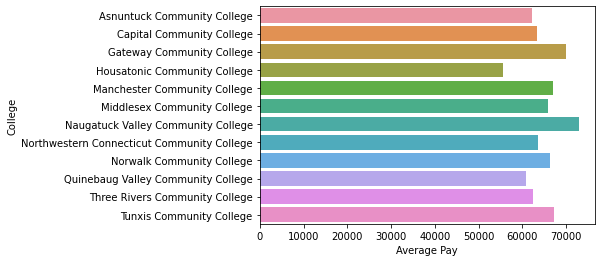

In [11]:
sns.barplot(data=df1, x='Average Pay', y='College')

Naugatuck Community College has tthe highest average Salary.

Which Community College has the greatest salary difference between Professor and Assistant Professor?

In [12]:
drop_cols= ['Average Pay', 'Associate Professor', 'Lecturer']

In [13]:
df1.drop(drop_cols, inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
df1.head()

,College,City,Average Professor,Assistant Professor
1,Asnuntuck Community College,Enfield,80280.0,48546.0
2,Capital Community College,Hartford,76905.0,52884.0
7,Gateway Community College,New Haven,80478.0,52767.0
10,Housatonic Community College,Bridgeport,75825.0,46818.0
13,Manchester Community College,Manchester,78345.0,50751.0


Creating new column which contains the difference in salary between Professor and Assistant Professor.

In [15]:
df1['Difference'] = df1['Average Professor'] - df1['Assistant Professor']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df1

,College,City,Average Professor,Assistant Professor,Difference
1,Asnuntuck Community College,Enfield,80280.0,48546.0,31734.0
2,Capital Community College,Hartford,76905.0,52884.0,24021.0
7,Gateway Community College,New Haven,80478.0,52767.0,27711.0
10,Housatonic Community College,Bridgeport,75825.0,46818.0,29007.0
13,Manchester Community College,Manchester,78345.0,50751.0,27594.0
14,Middlesex Community College,Middletown,76995.0,50913.0,26082.0
16,Naugatuck Valley Community College,Waterbury,84456.0,58977.0,25479.0
17,Northwestern Connecticut Community College,Winsted,77499.0,52389.0,25110.0
18,Norwalk Community College,Norwalk,73368.0,50121.0,23247.0
20,Quinebaug Valley Community College,Danielson,76167.0,56574.0,19593.0


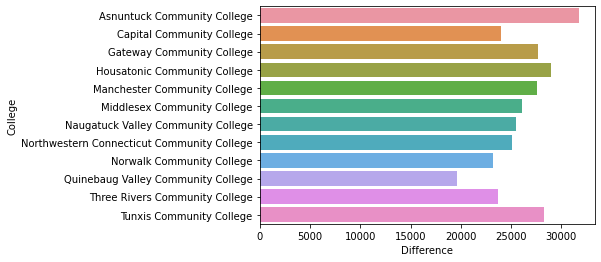

In [17]:
sns.barplot(data=df1, x='Difference', y='College')

Asnuntuck has the biggest diffence in salary. Quinebaug has the smallest. 